Randome Forest

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Import encoded dataframe

In [19]:
df = pd.read_pickle("df.pkl")
df_train = pd.read_pickle("df_train.pkl")
df_train_label = pd.read_pickle("df_train_label.pkl")
df_test = pd.read_pickle("df_test.pkl")
encodeDic = pd.read_pickle("dic.pkl")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22f775f8>]],
      dtype=object)

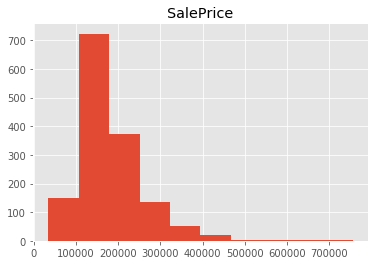

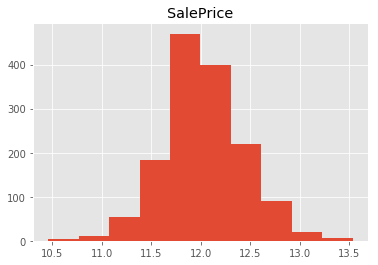

In [20]:
df_train_label = df_train_label.astype(int)
df_train_label_log = np.log( df_train_label )
df_train_label.hist()
df_train_label_log.hist()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_label_log, test_size=0.2, random_state=123)

Features sorted by their score:
[(0.5121, 'OverallQual'), (0.1283, 'GrLivArea'), (0.0626, 'TotalBsmtSF'), (0.0599, 'GarageCars'), (0.0254, '1stFlrSF'), (0.0183, 'YearBuilt'), (0.0175, 'OverallCond'), (0.0154, 'GarageArea'), (0.0133, 'LotArea'), (0.0124, 'Bsmt_GLQ'), (0.0098, 'YearRemodAdd'), (0.0071, 'Neighborhood'), (0.0071, 'MSSubClass'), (0.0071, '2ndFlrSF'), (0.0068, 'Bsmt_Unf'), (0.006, 'GarageType'), (0.0047, 'ExterQual'), (0.0045, 'TotalProchSF'), (0.0045, 'GarageYrBlt'), (0.0039, 'OpenPorchSF'), (0.0039, 'ExterCond'), (0.0038, 'LotFrontage'), (0.0035, 'WoodDeckSF'), (0.0033, 'BsmtQual'), (0.003, 'MoSold'), (0.0028, 'BsmtBath'), (0.0026, 'BldgType'), (0.0025, 'KitchenAbvGr'), (0.0024, 'PavedDrive'), (0.0024, 'MasVnr_BrkFace'), (0.0022, 'SaleCondition'), (0.0019, 'TotRmsAbvGrd'), (0.0019, 'HeatingQC'), (0.0018, 'GarageQual'), (0.0018, 'Bsmt_ALQ'), (0.0016, 'LandSlope'), (0.0016, 'FireplaceQu'), (0.0015, 'Exterior_BrkComm'), (0.0015, 'Condition1'), (0.0014, 'MSZoning'), (0.0013, '

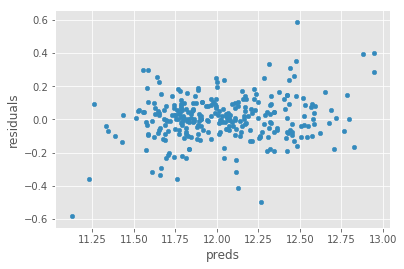

In [22]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model_rf.feature_importances_), X_train.columns), reverse = True))


preds = y_test.copy()
preds["preds"] = model_rf.predict(X_test)
preds["residuals"] = preds["SalePrice"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [23]:
import pickle
with open('rf.pkl', 'wb') as handle:
    pickle.dump(model_rf, handle, protocol=pickle.HIGHEST_PROTOCOL)